# 项目2 数据预处理

## 项目实训

### 任务一 数据标准化处理
#### 使用StandardScaler进行数据预处理
- StandardScaler类是一个用来将数据进行归一化和标准化的类。
- 将数据按其属性（按列进行）减去平均值和缩放到单位方差来标准化特征。得到的结果是，对于每个属性/每列来说所有数据都聚集在0附近，标准差为1，使得新的X数据集方差为1，均值为0
- 在进行标准化的过程中就将训练集的均值和方差当做是总体的均值和方差，因此对测试集使用训练集的均值和方差进行预处理。
#### 适用于：如果数据的分布本身就服从正态分布，就可以用这个方法。

In [1]:
# StandardScaler类的使用
from sklearn.preprocessing import StandardScaler  
import numpy as np  
X = np.array([[ 1., -1.,  2.],  
              [ 2.,  0.,  0.],  
              [ 0.,  1., -1.]])  
# calculate mean  
X_mean = X.mean(axis=0)  
# calculate variance   
X_std = X.std(axis=0)  
# standardize X  
X1 = (X-X_mean)/X_std  # 自己计算

# 调用sklearn包的方法
X_scale = StandardScaler().fit_transform(X)
# 最终X1与X_scale等价
print('均值方差标准化后的数据：\n',X1)
print('StandardScaler标准差标准化后的数据：\n',X_scale)

均值方差标准化后的数据：
 [[ 0.         -1.22474487  1.33630621]
 [ 1.22474487  0.         -0.26726124]
 [-1.22474487  1.22474487 -1.06904497]]
StandardScaler标准差标准化后的数据：
 [[ 0.         -1.22474487  1.33630621]
 [ 1.22474487  0.         -0.26726124]
 [-1.22474487  1.22474487 -1.06904497]]


#### 1. 数据准备

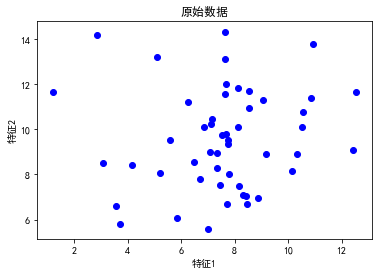

In [2]:
%matplotlib inline
#导入绘图工具
import matplotlib.pyplot as plt
# 导入数据集生成工具
from sklearn.datasets import make_blobs
plt.rcParams['font.sans-serif'] = ['SimHei']   # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False     # 用来正常显示负号

# 生成一个样本量为50，分类数为1，标准差为1的数据集
X, y = make_blobs(n_samples=50, centers=1, cluster_std=2, random_state=8)
# 用散点图绘制数据点
plt.scatter(X[:, 0], X[:, 1], c='blue')
plt.xlabel('特征1')
plt.ylabel('特征2')
plt.title('原始数据')
plt.show()

#### 2. 数据标准化

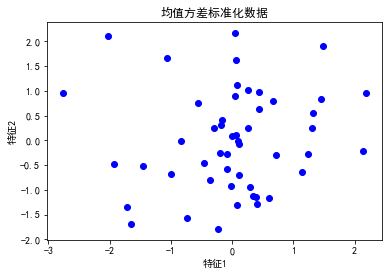

In [3]:
# 导入StandardScaler
from sklearn.preprocessing import StandardScaler
# 使用StandardScaler进行数据处理
scaler = StandardScaler().fit(X)
X_1 = scaler.transform(X)
# 也可以用fit_transform()实现
# X_1 = StandardScaler().fit_transform(X)

# 用散点图绘制经过预处理的数据点
plt.scatter(X_1[:, 0], X_1[:, 1], c='blue')
plt.xlabel('特征1')
plt.ylabel('特征2')
plt.title('均值方差标准化数据')
plt.show()

### 任务二 数据离差标准化处理
- 将每个元素（特征，feature）转换成给定范围的值。
- MinMaxScaler有一个重要参数"feature_range"，控制数据压缩到的范围，默认是[0,1]。
#### 适用于数据在一个范围内分布的情况，在不涉及距离度量、协方差计算、数据不符合正太分布的时候，可以使用MinMaxScaler。

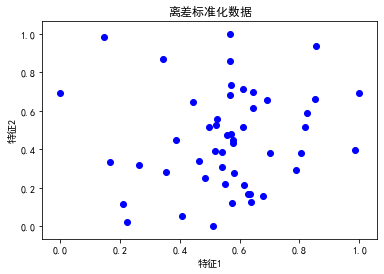

In [4]:
# 导入MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
# 使用MinMaxScaler进行数据预处理
X_2 = MinMaxScaler().fit_transform(X)
# 绘制散点图
plt.scatter(X_2[:, 0], X_2[:, 1], c='blue')
plt.xlabel('特征1')
plt.ylabel('特征2')
plt.title('离差标准化数据')
plt.show()

### 任务三 数据二值化处理
- 特征的二值化主要是为了将数据特征转化为boolean变量
- Binarizer也可以设置一个阈值，结果数据值大于阈值的为1，小于阈值的为0

In [5]:
import numpy as np
# 导入Binarizer
from sklearn.preprocessing import Binarizer
data = np.array([[ 3, -1.5,  2, -5.4],
                 [ 0,  4,  -0.3, 2.1],
                 [ 1,  3.3, -1.9, -4.3]])
# binarization
data_binarized = Binarizer(threshold=1.4).transform(data)
print("二值化处理后的数据: \n", data_binarized)

二值化处理后的数据: 
 [[1. 0. 1. 0.]
 [0. 1. 0. 1.]
 [0. 1. 0. 0.]]


### 任务四 数据归一化处理
- normalizer 数据归一化使每个特征向量的值都缩放到相同的数值范围。归一化的形式有l1,l2范数等
- sklearn.preprocessing.Normalizer(norm=’l2’, copy=True)
    - norm：可以为l1、l2或max，默认为l2
    - 若为l1时，样本各个特征值除以各个特征值的绝对值之和
    - 若为l2时，样本各个特征值除以各个特征值的平方之和
    - 若为max时，样本各个特征值除以样本中特征值最大的值
    
#### 归一化是将样本在向量空间模型上的一个转换，经常被使用在分类与聚类中。

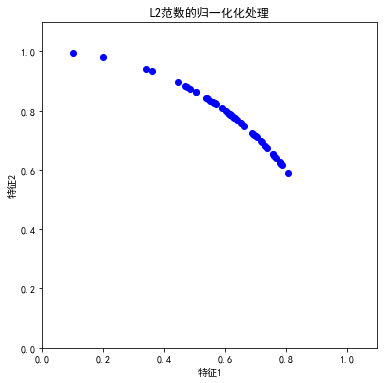

In [6]:
# 导入Normalizer
from sklearn.preprocessing import Normalizer
# 使用Normalizer进行数据预处理，默认为l2范数
# 将所有样本的特征向量转化为欧几里得距离为1；通常在只想保留数据特征向量的方向，而忽略其数值的时候使用
X_3 = Normalizer().fit_transform(X)
# 绘制散点图
plt.figure(figsize=(6, 6))
plt.scatter(X_3[:, 0], X_3[:, 1], c='blue')
plt.xlim(0, 1.1)
plt.ylim(0, 1.1)
plt.xlabel('特征1')
plt.ylabel('特征2')
plt.title('L2范数的归一化化处理')
plt.show()

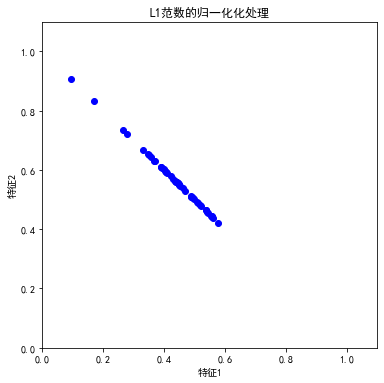

In [7]:
# 修改norm参数为范数l1
X_4 = Normalizer(norm='l1').fit_transform(X)
# 绘制散点图
plt.figure(figsize=(6, 6))
plt.scatter(X_4[:, 0], X_4[:, 1], c='blue')
plt.xlim(0, 1.1)
plt.ylim(0, 1.1)
plt.xlabel('特征1')
plt.ylabel('特征2')
plt.title('L1范数的归一化化处理')
plt.show()

### 任务五 独热编码处理
- 独热编码（One-Hot Encoding）把特征向量的每个特征与特征的非重复总数相对应，通过one-of-k的形式对每个值进行编码，如果非重复计数的值是k，那么就把这个特征转换为只有一个值是1其他值都是0的k维向量。
- OneHotEncoder 参数：
    - categories： 表示特征的取值，该参数取值为list或者默认的’auto’
    - sparse：若为True时，返回稀疏矩阵，否则返回数组，默认为True

In [8]:
import numpy as np
# 导入OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
data_type = np.array([[0, 1],
                      [1, 3],
                      [2, 0],
                      [1, 2]])
encoder = OneHotEncoder(categories='auto').fit(data_type)
data_encoded = encoder.transform(data_type).toarray()
print("编码后的数据: \n", data_encoded)

编码后的数据: 
 [[1. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1.]
 [0. 0. 1. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0.]]


#### 对数据进行“离散化处理”（装箱）

- numpy.digitize(x, bins, right = False)
- 该函数返回输入数组x中每个值所属的数组bins的区间索引。
- 参数：
    - x : numpy数组
    - bins : 一维单调数组，必须是升序或者降序
    - right：间隔是否包含最右
- 返回值：x在bins中的位置。

In [9]:
import numpy as np
# 定义一个随机数的数组
np.random.seed(38)
arr = np.random.uniform(-5, 5, size=20)
# 设置箱体数为5
bins = np.linspace(-5, 5, 6)
# 将数据进行装箱操作
target_bin = np.digitize(arr, bins=bins)
# 打印装箱数据范围
print('装箱数据范围：\n{}'.format(bins))
print('\n数据点的特征值：\n{}'.format(arr))
print('\n数据点所在的箱子：\n{}'.format(target_bin))

装箱数据范围：
[-5. -3. -1.  1.  3.  5.]

数据点的特征值：
[-1.1522688   3.59707847  4.44199636  2.02824894  1.33634097  1.05961282
 -2.99873157 -1.12612112 -2.41016836 -4.25392719 -2.19043025 -0.61565849
 -0.16750956  3.68489486  0.29629384  0.62263144 -0.28944656  1.88842007
  0.04828605  3.23175755]

数据点所在的箱子：
[2 5 5 4 4 4 2 2 2 1 2 3 3 5 3 3 3 4 3 5]


#### 将已经装箱的数据进行OneHotEncoder独热编码

In [10]:
# 导入独热编码
from sklearn.preprocessing import OneHotEncoder
target_bin = target_bin.reshape(-1, 1)
onehot = OneHotEncoder(sparse=False, categories='auto')
onehot.fit(target_bin)
# 使用独热编码转化数据
arr_in_bin = onehot.transform(target_bin)
# 打印结果
print('装箱编码后的数据形态：{}'.format(arr_in_bin.shape))
print('\n装箱编码后的数据值：\n{}'.format(arr_in_bin))

装箱编码后的数据形态：(20, 5)

装箱编码后的数据值：
[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]]


### 任务六 数据PCA降维处理
- PCA通过计算协方差矩阵的特征值和相应的特征向量，在高维数据中找到最大方差的方向，并将数据映射到一个维度不大于原始数据的新的子空间中。

#### 1. 导入iris（鸢尾花）数据集

In [11]:
# 导入iris（鸢尾花）数据集
from sklearn.datasets import load_iris
# 加载iris数据集
iris = load_iris()
X = iris.data
print('iris数据集的维度为：', X.shape)

iris数据集的维度为： (150, 4)


In [12]:
print('iris数据集的前5行数据为：\n', X[:5])

iris数据集的前5行数据为：
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


#### 2. 指定特征数的PCA降维

In [13]:
# 导入PCA
from sklearn.decomposition import PCA
# 指定保留的特征数为3
pca_num = PCA(n_components=3)
# 训练PCA模型
pca_num.fit(X)
# 对样本数据进行PCA降维
X_pca1 = pca_num.transform(X)
# 查看降维结果
print('iris数据集进行指定特征数的降维后的维度为：', X_pca1.shape)

iris数据集进行指定特征数的降维后的维度为： (150, 3)


In [14]:
print('指定特征数的降维后iris数据集的前5行数据为：\n', X_pca1[:5])

指定特征数的降维后iris数据集的前5行数据为：
 [[-2.68412563  0.31939725 -0.02791483]
 [-2.71414169 -0.17700123 -0.21046427]
 [-2.88899057 -0.14494943  0.01790026]
 [-2.74534286 -0.31829898  0.03155937]
 [-2.72871654  0.32675451  0.09007924]]


In [15]:
# 查看原始特征与PCA主成分之间的关系
import numpy as np
print('指定特征数的降维后的最大方差的成分：')
for i in range(pca_num.components_.shape[0]):
    arr = np.around(pca_num.components_[i], 2)
    print('component{0}: {1}'.format((i+1), [x for x in arr]))

指定特征数的降维后的最大方差的成分：
component1: [0.36, -0.08, 0.86, 0.36]
component2: [0.66, 0.73, -0.17, -0.08]
component3: [-0.58, 0.6, 0.08, 0.55]


In [16]:
# 查看降维后的各主成分的方差值和方差占比
var = np.around(pca_num.explained_variance_, 2)
print('指定特征数的降维后的各主成分的方差为：', [x for x in var])
var_ratio = np.round(pca_num.explained_variance_ratio_, 2)
print('指定特征数的降维后的各主成分的方差百分比为：', [x for x in var_ratio])

指定特征数的降维后的各主成分的方差为： [4.23, 0.24, 0.08]
指定特征数的降维后的各主成分的方差百分比为： [0.92, 0.05, 0.02]


#### 3. 指定方差百分比的PCA降维

In [17]:
# 指定保留的方差百分比为0.95
pca_per = PCA(n_components=0.95)
# 训练PCA模型
pca_per.fit(X)
# 对样本数据进行PCA降维
X_pca2 = pca_per.transform(X)
# 查看降维结果
print('iris数据集进行指定方差百分比的降维后的维度为：', X_pca2.shape)

iris数据集进行指定方差百分比的降维后的维度为： (150, 2)


In [18]:
print('指定方差百分比的降维后iris数据集的前5行数据为：\n', X_pca2[:5])

指定方差百分比的降维后iris数据集的前5行数据为：
 [[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]]


In [19]:
# 查看原始特征与PCA主成分之间的关系
print('指定方差百分比降维后的最大方差的成分：')
for i in range(pca_per.components_.shape[0]):
    arr = np.round(pca_per.components_[i], 2)
    print('component{0}: {1}'.format((i+1), [x for x in arr]))

指定方差百分比降维后的最大方差的成分：
component1: [0.36, -0.08, 0.86, 0.36]
component2: [0.66, 0.73, -0.17, -0.08]


In [20]:
# 查看降维后的各主成分的方差值和方差占比
var = np.around(pca_per.explained_variance_, 2)
print('指定方差百分比的降维后的各主成分的方差为：', [x for x in var])
var_ratio = np.round(pca_per.explained_variance_ratio_, 2)
print('指定方差百分比的降维后的各主成分的方差百分比为：', [x for x in var_ratio])

指定方差百分比的降维后的各主成分的方差为： [4.23, 0.24]
指定方差百分比的降维后的各主成分的方差百分比为： [0.92, 0.05]


## 项目拓展
### 数据预处理实战——wine酒数据集拆分、标准化和降维处理

### 1. 导入wine酒数据集

In [21]:
# 导入wine酒模块
from sklearn.datasets import load_wine
import numpy as np
# 加载wine数据集
wine = load_wine()
# “data”是特征数据
X = wine.data
# “target”是目标变量数据(酒的类别标签)
y = wine.target
# 查看特征数据的维度
print('wine数据集的维度为：', X.shape)
# 查看酒的类别
print('wine数据集的类别标签为：', np.unique(y))

wine数据集的维度为： (178, 13)
wine数据集的类别标签为： [0 1 2]


### 2. 将wine数据集划分为训练集和测试集

In [22]:
# 导入数据集拆分工具
from sklearn.model_selection import train_test_split

# 将数据集拆分为训练数据集和测试数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8)

# 输出训练数据集中特征向量的维度
print('训练集数据维度：', X_train.shape)
# 输出训练数据集中目标标签的维度
print('训练集标签维度：', y_train.shape)
# 输出测试数据集中特征向量的维度
print('测试集数据维度：', X_test.shape)
# 输出测试数据集中特征向量的维度
print('测试集标签维度：', y_test.shape)

训练集数据维度： (133, 13)
训练集标签维度： (133,)
测试集数据维度： (45, 13)
测试集标签维度： (45,)


### 3. 对数据集进行标准化处理

In [23]:
# 导入StandardScaler
from sklearn.preprocessing import StandardScaler
# 对训练集进行拟合生成规则
scaler = StandardScaler().fit(X_train)
# 对训练集数据进行转换
X_train_scaled = scaler.transform(X_train)
# 对测试集数据进行转换
X_test_scaled = scaler.transform(X_test)

print('标准化前训练集数据的最小值和最大值：{0}, {1}'.format(X_train.min(), X_train.max()))
print('标准化后训练集数据的最小值和最大值：{0:.2f}, {1:.2f}'.format(X_train_scaled.min(), X_train_scaled.max()))
print('标准化前测试集数据的最小值和最大值：{0}, {1}'.format(X_test.min(), X_test.max()))
print('标准化后测试集数据的最小值和最大值：{0:.2f}, {1:.2f}'.format(X_test_scaled.min(), X_test_scaled.max()))

标准化前训练集数据的最小值和最大值：0.13, 1680.0
标准化后训练集数据的最小值和最大值：-3.93, 4.46
标准化前测试集数据的最小值和最大值：0.14, 1510.0
标准化后测试集数据的最小值和最大值：-2.60, 3.68


### 4. 对数据集进行降维处理

In [24]:
# 导入PCA
from sklearn.decomposition import PCA
# 设置主成分数量为2
pca = PCA(n_components=2)
# 对标准化后的训练集进行拟合生成规则
pca.fit(X_train_scaled)
# 对标准化后的训练集数据进行PCA降维
X_train_pca = pca.transform(X_train_scaled)
# 对标准化后的测试集数据进行PCA降维
X_test_pca = pca.transform(X_test_scaled)

print('降维后训练集的维度为：', X_train_pca.shape)
print('降维后测试集的维度为：', X_test_pca.shape)

降维后训练集的维度为： (133, 2)
降维后测试集的维度为： (45, 2)


### 5. wine数据集可视化

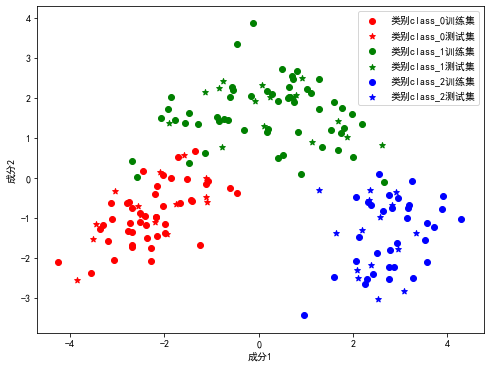

In [25]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']   # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False     # 用来正常显示负号

# 绘制wine数据集图形
plt.figure(figsize=(8, 6))
for i, color, name in zip(np.unique(y), ['r','g','b'], wine.target_names):
    # 绘制降维后的训练集样本图形
    plt.scatter(X_train_pca[y_train==i,0], X_train_pca[y_train==i,1],
                c=color, marker='o', label='类别'+name+'训练集')
    # 绘制降维后的测试集样本图形
    plt.scatter(X_test_pca[y_test==i,0], X_test_pca[y_test==i,1],
                c=color, marker='*', label='类别'+name+'测试集')

plt.xlabel("成分1")
plt.ylabel("成分2")
plt.legend(loc='best')
plt.show()